Создание набора данных. Реализуется функция make_data.

In [1]:
import numpy as np
import pandas as pd
def make_data(n, seed):
    np.random.seed(seed)

    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

Получение наборов данных train и test с помощью функции make_data. \


In [2]:
train_data = make_data(80, 42)
test_data = make_data(55, 123)
print(train_data.head())
print(test_data.head())


              x         y
55    78.625602  2.274967
101  102.856849  4.470237
193  176.801229  1.858771
171  162.054913  0.937679
91   103.683794  4.958931
              x         y
106  116.120723  4.948029
62   113.350494  4.129593
91   129.125418  4.200947
140  217.258552  2.158303
108  134.089481  4.119353


Стандартизация данных.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

С помощью метода .fit_predict обучение модели для кластеризации методом K-means для трёх кластеров. Получение меток кластеров.

In [4]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3, random_state = 0)
train_clusters = k_means.fit_predict(train_data_scaled)

Визуализация кластеров с помощью scatter. \


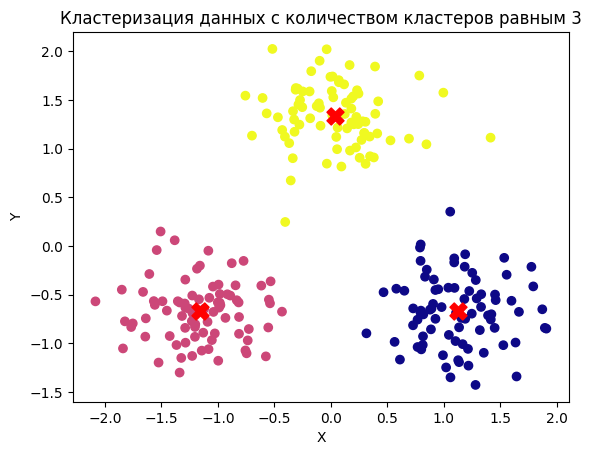

In [5]:
import matplotlib.pyplot as plt
centers = k_means.cluster_centers_
plt.scatter(train_data_scaled[:, 0], train_data_scaled[:, 1], c=train_clusters, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], s=150, c='red', marker='X')
plt.title('Кластеризация данных с количеством кластеров равным 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Из графика можно увидеть, что три группы данных чётко разделены, что говорит о хорошей структуре тренировочного набора. Центроиды кластеров расположены примерно в центрах групп точек, что показывает правильное обучение модели. \
Выполнение предсказаний, используя тестовые данные test. Построение графиков для тестовых данных. \


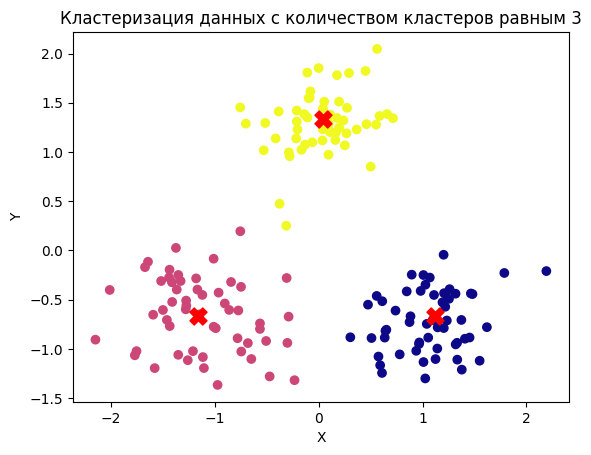

In [6]:
test_clusters = k_means.predict(test_data_scaled)
test_centers = k_means.cluster_centers_
plt.scatter(test_data_scaled[:, 0], test_data_scaled[:, 1], c=test_clusters, cmap='plasma')
plt.scatter(test_centers[:, 0], test_centers[:, 1], s=150, c='red', marker='X')
plt.title('Кластеризация данных с количеством кластеров равным 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика можно увидеть, что кластеры чётко разделены, как и на тренировочном наборе. Центроиды находятся в центрах каждой группы, что указывает на правильное предсказание модели. Структура кластеров аналогична тренировочным данным, модель смогла распознать те же три группы и определить их центры. Модель показала хорошую точность на тестовом наборе данных. \
Подсчет коэффициента силуэта.

In [11]:
from sklearn.metrics import silhouette_score
score = silhouette_score(test_data_scaled, test_clusters)
print("Качество кластеризации по метрике Cилуэта", score)

Качество кластеризации по метрике Cилуэта 0.6967633737367738


Коэффициент показывает, насколько каждая точка похожа на точки из своего кластера по сравнению с точками других кластеров. Коэффициент силуэта 0.6967 это хороший результат. Модель правильно разделила данные на кластеры, и большинство точек находятся внутри своих кластеров. \
Повторение обучения модели и предсказания на тренировочном наборе данных с количеством кластеров равным 2.

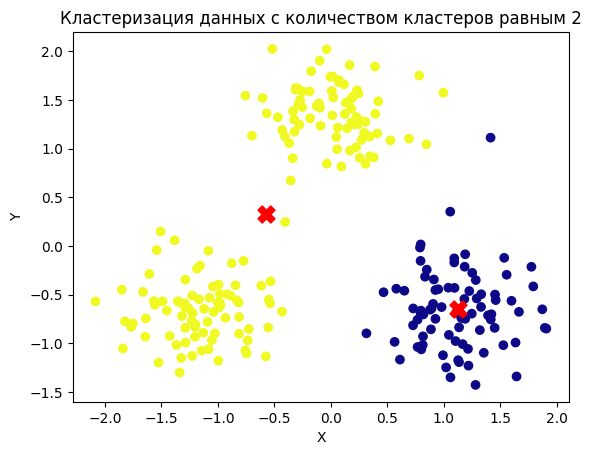

In [7]:
k_means2 = KMeans(n_clusters = 2, random_state = 0)
train_clusters2 = k_means2.fit_predict(train_data_scaled)
centers2 = k_means2.cluster_centers_
plt.scatter(train_data_scaled[:, 0], train_data_scaled[:, 1], c=train_clusters2, cmap='plasma')
plt.scatter(centers2[:, 0], centers2[:, 1], s=150, c='red', marker='X')
plt.title('Кластеризация данных с количеством кластеров равным 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика можно увидеть, что желтый кластер достаточно компактный, но в нём есть довольно много точек, разбросанных вдоль оси X. Это может означать, что внутри кластера есть подгруппы, которые алгоритм объединил. Синий кластер также имеет не чёткое разделение, точки кажутся более разбросанными, что может свидетельствовать о том, что модель не смогла правильно разделить более сложные структуры данных. Центр желтого кластера находится в области, где точки распределены не плотно, что может говорить о слабом разделении кластеров. \
Предсказание модели на тестовом наборе данных (количество кластеров равно 2).


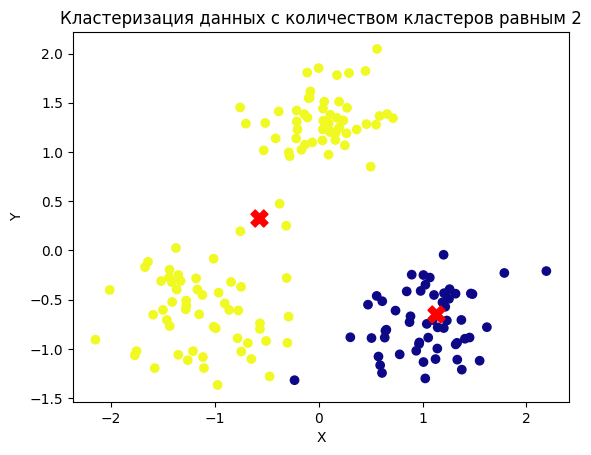

In [8]:
test_clusters2 = k_means2.predict(test_data_scaled)
test_centers2 = k_means2.cluster_centers_
plt.scatter(test_data_scaled[:, 0], test_data_scaled[:, 1], c=test_clusters2, cmap='plasma')
plt.scatter(test_centers2[:, 0], test_centers2[:, 1], s=150, c='red', marker='X')
plt.title('Кластеризация данных с количеством кластеров равным 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика можно увидеть, что кластеры разделены не четко, как и на тренировочном наборе. Структура кластеров аналогична тренировочным данным, модель смогла распознать те же две группы и определить их центры. Центры кластеров выглядят более точными, относительно тренировочного набора. Можно сказать, что модель отработала неплохо на тестовом наборе данных, однако в связи с большим разбросом точек, количество кластеров (2) для такого набора данных недостаточно, стоит рассмотреть увеличение количества кластеров. \
Подсчет коэффициента силуэта.

In [12]:
score2 = silhouette_score(test_data_scaled, test_clusters2)
print("Качество кластеризации (количество кластеров 2) по метрике Cилуэта", score2)

Качество кластеризации (количество кластеров 2) по метрике Cилуэта 0.4690154268883887


Коэффициент силуэта 0.46901 это не очень хороший результат. Так как это значение меньше, чем рассчитанное для модели с количеством кластеров 3, можно сделать вывод, что количество кластеров 2 для данной модели недостаточно. \
Повторение обучения модели и предсказания на тренировочном наборе данных с количеством кластеров равным 4.

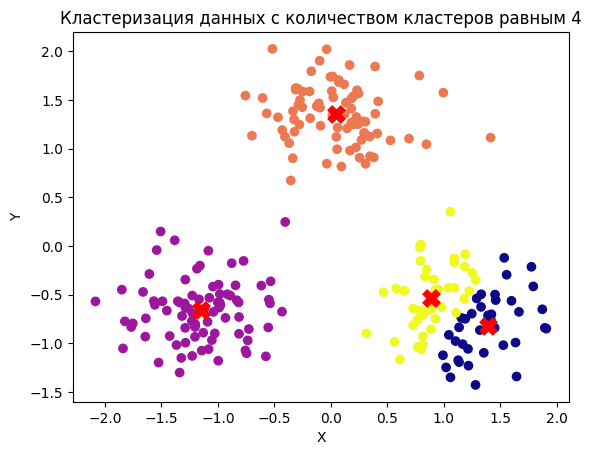

In [13]:
k_means4 = KMeans(n_clusters = 4, random_state = 0)
train_clusters4 = k_means4.fit_predict(train_data_scaled)
centers4 = k_means4.cluster_centers_
plt.scatter(train_data_scaled[:, 0], train_data_scaled[:, 1], c=train_clusters4, cmap='plasma')
plt.scatter(centers4[:, 0], centers4[:, 1], s=150, c='red', marker='X')
plt.title('Кластеризация данных с количеством кластеров равным 4')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика можно увидеть, что кластеры разделены достаточно четко, можно выделить все 4 кластера. Однако синий и желтый кластеры перекрываются, что плохо, предполагается, что количество кластеров 4 - большое для такого набора данных. Центры кластеров определены логично, находятся в плотных скоплениях точек. \
Предсказание модели на тестовом наборе данных (количество кластеров равно 3).

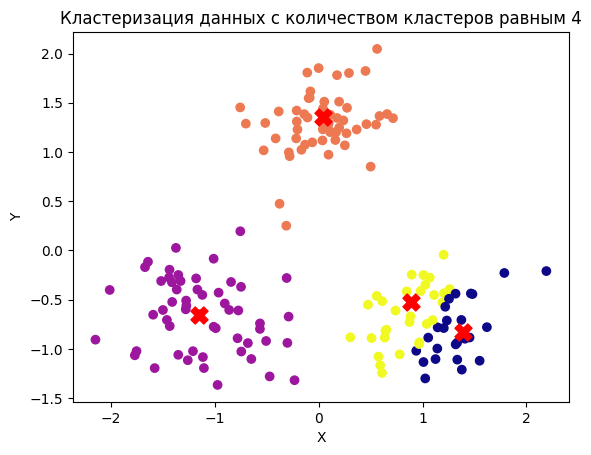

In [14]:
test_clusters4 = k_means4.predict(test_data_scaled)
test_centers4 = k_means4.cluster_centers_
plt.scatter(test_data_scaled[:, 0], test_data_scaled[:, 1], c=test_clusters4, cmap='plasma')
plt.scatter(test_centers4[:, 0], test_centers4[:, 1], s=150, c='red', marker='X')
plt.title('Кластеризация данных с количеством кластеров равным 4')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика можно увидеть, что кластеры разделены также четко, как и на тренировочном наборе. Структура кластеров аналогична тренировочным данным, модель смогла распознать те же четыре группы и определить их центры. Центр фиолетового кластера выглядит менее точным, относительно тренировочного набора. По прежнему существует перекрытие желтого и синего кластеров. Делается вывод, что количество кластеров превышает необходимое для такого набора данных. \
Подсчет коэффициента силуэта.

In [15]:
score4 = silhouette_score(test_data_scaled, test_clusters4)
print("Качество кластеризации (количество кластеров 4) по метрике Cилуэта", score4)

Качество кластеризации (количество кластеров 4) по метрике Cилуэта 0.5317404466603888


Коэффициент силуэта 0.5317 это средний результат, меньше чем с количеством кластеров 3, но лучше чем с количеством кластеров 2. Можно сделать вывод, что количество кластеров 4 для данной модели большое, 2 недостаточное, 3 будет верным. \
Построение графика по “методу локтяˮ. \



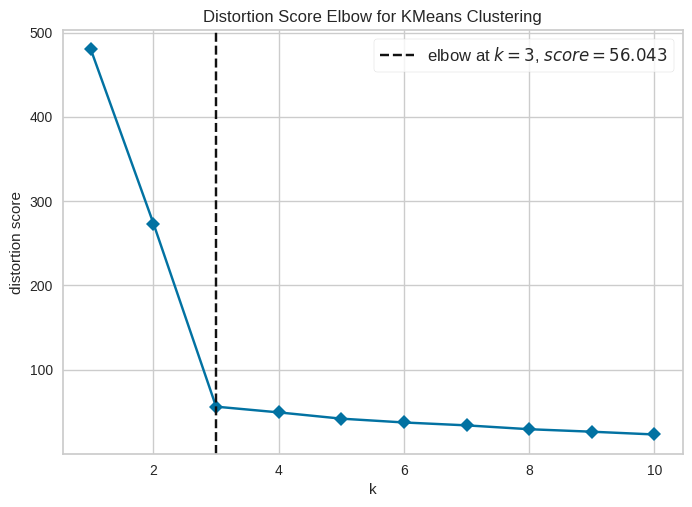

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(k_means, k=(1,11), timings=False)
visualizer.fit(train_data_scaled)
visualizer.show()

На этом графике ось X показывает количество кластеров k, от 1 до 10. На графике видно, как изменяется качество кластеризации в зависимости от количества кластеров. Ось Y отображает сумму квадратов расстояний от точек до ближайшего центроида. Score = 56.043 показывает, насколько далеко точки находятся от центров своих кластеров, если разбить данные на 3 кластера. Чем меньше это число, тем плотнее точки сгруппированы вокруг своих центров. То есть, кластеры получаются более компактными и лучше отделены друг от друга. Если выбирать 3 кластера, общее расстояние всех точек до их центров становится достаточно маленьким, что говорит о хорошей кластеризации. с увеличением количества кластеров с 1 до 3 данные становятся лучше сгруппированными. Добавление кластеров помогает четко разделить данные на логичные группы. Добавление новых кластеров после 3 почти не улучшает разделение данных. Разделение на большее количество групп не дает большого эффекта. Можно сделать вывод, что оптимально использовать 3 кластера. \
Загрузка набора данных. Вывод первых 5 строк датафрейма.



In [18]:
heart_data = pd.read_csv('1heart.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


Предварительная обработка данных. \
С помощью метода info() осуществляется вывод информации о данных.

In [19]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


Преобразование столбца Cholesterol в числовой формат с заменой некорректных значений на NaN.

In [20]:
heart_data['Cholesterol'] = pd.to_numeric(heart_data['Cholesterol'], errors='coerce')

Проверка датасета на наличие пропусков с помощью метода isna(), подсчет пропусков с помощью метода sum().

In [21]:
heart_data.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,2
Cholesterol,2
FastingBS,0
RestingECG,1
MaxHR,1
ExerciseAngina,0
Oldpeak,0


Обработка пропущенных значений.

In [22]:
heart_data['RestingBP'].fillna(heart_data['RestingBP'].median(), inplace=True)
heart_data['Cholesterol'].fillna(heart_data['Cholesterol'].median(), inplace=True)
heart_data['MaxHR'].fillna(heart_data['MaxHR'].median(), inplace=True)
heart_data['RestingECG'].fillna(heart_data['RestingECG'].mode()[0], inplace=True)
heart_data.isna().sum()

/tmp/ipython-input-22-1002980722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['RestingBP'].fillna(heart_data['RestingBP'].median(), inplace=True)
/tmp/ipython-input-22-1002980722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Типы данных проверены, изменены. Пропуски заполнены. \
Поиск явных дубликатов в данных.

In [24]:
print(heart_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
920     True
921     True
922    False
923    False
924    False
Length: 925, dtype: bool


Удаление явных дубликатов.

In [25]:
heart_data = heart_data.drop_duplicates().reset_index(drop=True)
print(heart_data.duplicated().sum())

0


Явных дубликатов нет.\
Поиск неявных дубликатов.

In [26]:
print(heart_data['Sex'].unique())
print(heart_data['ChestPainType'].unique())
print(heart_data['RestingECG'].unique())
print(heart_data['ExerciseAngina'].unique())
print(heart_data['ST_Slope'].unique())

['M' 'F' 'Ma']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down' 'UP']


Удаление неявных дубликатов. Проверка.

In [27]:
heart_data['Sex'] = heart_data['Sex'].replace('Ma', 'M')
heart_data['ST_Slope'] = heart_data['ST_Slope'].replace('UP', 'Up')
print(heart_data['Sex'].unique())
print(heart_data['ST_Slope'].unique())

['M' 'F']
['Up' 'Flat' 'Down']


Вывод статистической сводки каждого столбца, содержащего числовые значения.

In [28]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,53.519001,132.412595,199.027144,0.232356,136.824104,0.885993,0.552660
std,9.418409,18.481460,109.315202,0.422564,25.437552,1.065522,0.497489
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Выявлены выбросы в столбцах RestingBP, Cholesterol, Oldpeak. Минимальное значение артериального давления не может быть 0. Замена значения 0 на медиану. Минимальное значение холестерина не может быть 0. Замена значения 0 на медиану. Минимальное значение изменения ST-сегмента на ЭКГ не может быть отрицательным (-2.6). Установление нижнего порога в 0. Повторный вывод сводки.

In [29]:
heart_data['RestingBP'] = heart_data['RestingBP'].replace(0, heart_data['RestingBP'].median())
heart_data['Cholesterol'] = heart_data['Cholesterol'].replace(0, heart_data['Cholesterol'].median())
heart_data['Oldpeak'] = heart_data['Oldpeak'].apply(lambda x: x if x >= 0 else 0)
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,53.519001,132.553746,240.673181,0.232356,136.824104,0.899891,0.552660
std,9.418409,17.958091,53.993464,0.422564,25.437552,1.044119,0.497489
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Предварительная обработка данных завершена. \
Выбор целевой переменной. В данном датасете целевая переменная - HeartDisease - указывает на наличие или отсутствие сердечного заболевания. HeartDisease принимает значения 0 (нет заболевания) или 1 (есть заболевание). Удаление целевой переменной из датасета. Построение матрицы диаграмм рассеяния, выделение значения целевой переменной разными цветами.


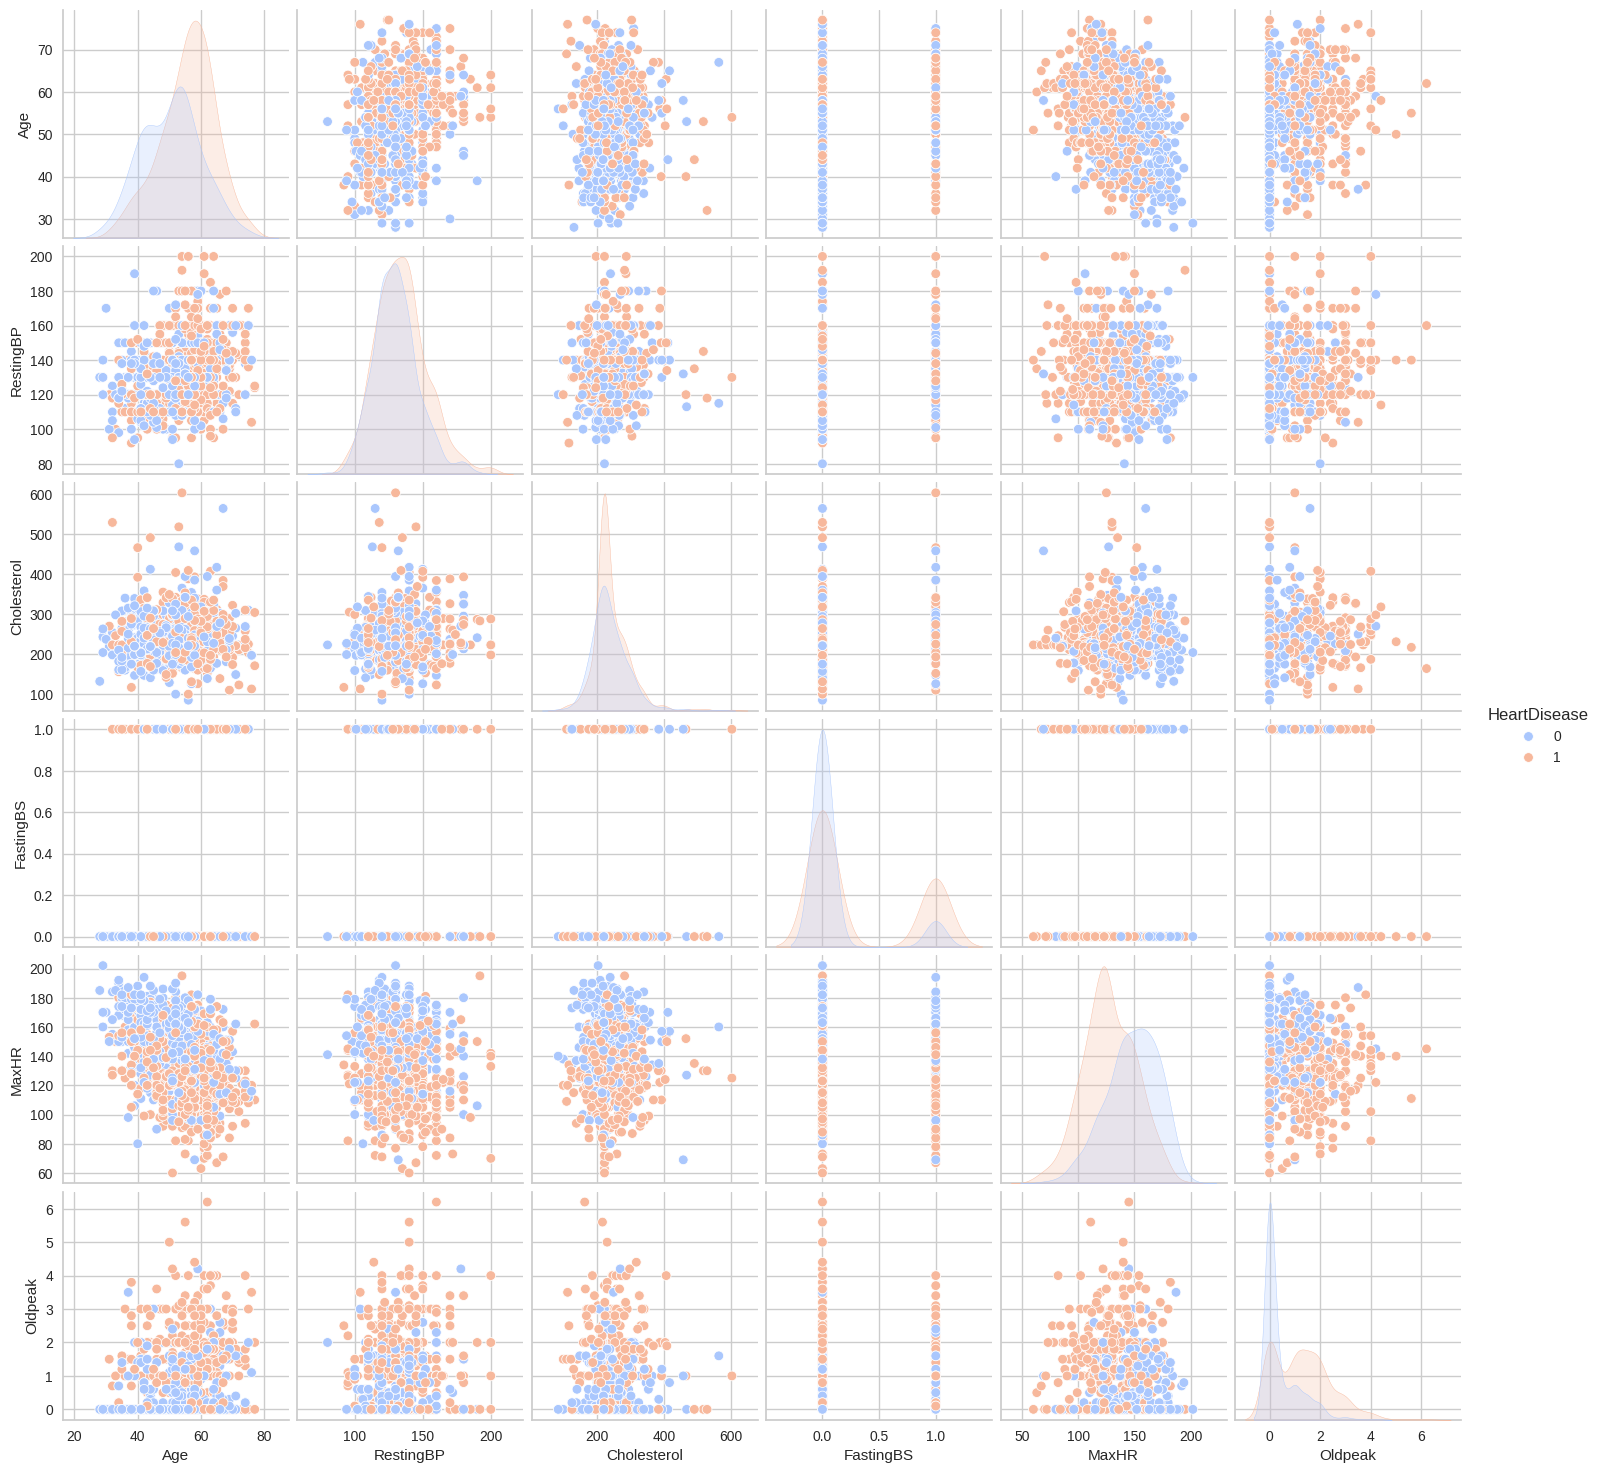

In [30]:
import seaborn as sns
goal_var = 'HeartDisease'
numerical_features = heart_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove(goal_var)
sns.pairplot(heart_data[numerical_features + [goal_var]], hue=goal_var, palette='coolwarm')
plt.show()

На графике видно, что возраст имеет однозначную связь с болезнью сердца, люди с диагнозом в основном старше. Распределение оранжевых точек сдвинуто вправо, особенно в переменной Age, значит, чем старше человек, тем выше вероятность болезни. Похожая ситуация с Oldpeak, здоровые почти не встречаются при высоких значениях, а больные наоборот концентрируются в диапазоне от 1.0 и выше. Это чёткий маркер. \
MaxHR ведёт себя противоположно, здоровые чаще показывают высокие значения, а у больных пульс ниже. \
В общем признаки Age, Oldpeak и MaxHR явно разделяют классы. Остальные либо слабоинформативны, либо требуют перекрестного анализа с другими переменными. \
Удаление целевой переменной из датасета.

In [31]:
heart_data_new = heart_data.drop(columns=[goal_var])

Выполнение стандартизации числовых данных с помощью StandardScaler.

In [32]:
scaler = StandardScaler()
heart_data_new[numerical_features] = scaler.fit_transform(heart_data_new[numerical_features])

Выполнение кластеризации объектов методом k-means. Подобор оптимального количества кластеров с помощью "метода локтя".

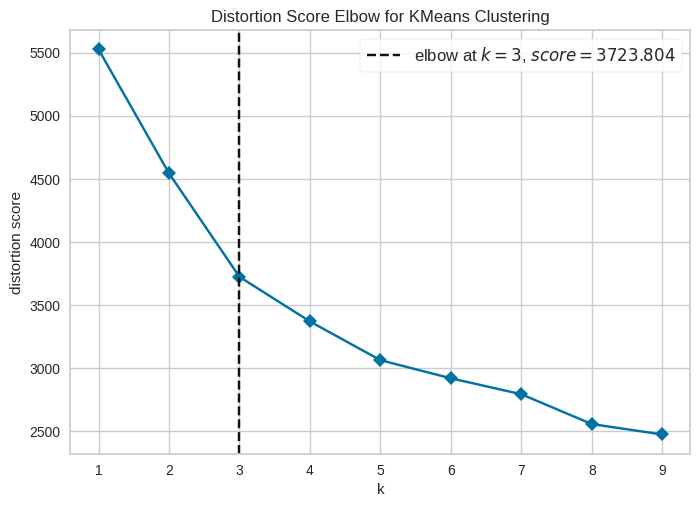

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
k_means5 = KMeans(n_clusters = 3, random_state = 0)
clusters5 = k_means5.fit_predict(heart_data_new[numerical_features])
visualizer = KElbowVisualizer(k_means5, k=(1,10), timings=False)
visualizer.fit(heart_data_new[numerical_features])
visualizer.show()

Исходя из графика, можно сказать, что оптимальное количество кластеров равно 3. \
Проверка оптимального количества кластеров. Оценка качества кластеризации с различным количеством кластеров по метрике Силуэта.

In [34]:
score5 = silhouette_score(heart_data_new[numerical_features], clusters5)
print("Качество кластеризации (количество кластеров 3) по метрике Cилуэта", score5)
k_means6 = KMeans(n_clusters = 2, random_state = 0)
clusters6 = k_means6.fit_predict(heart_data_new[numerical_features])
score6 = silhouette_score(heart_data_new[numerical_features], clusters6)
print("Качество кластеризации (количество кластеров 2) по метрике Cилуэта", score6)
k_means7 = KMeans(n_clusters = 4, random_state = 0)
clusters7 = k_means7.fit_predict(heart_data_new[numerical_features])
score7 = silhouette_score(heart_data_new[numerical_features], clusters7)
print("Качество кластеризации (количество кластеров 4) по метрике Cилуэта", score7)
k_means8 = KMeans(n_clusters = 5, random_state = 0)
clusters8 = k_means8.fit_predict(heart_data_new[numerical_features])
score8 = silhouette_score(heart_data_new[numerical_features], clusters8)
print("Качество кластеризации (количество кластеров 5) по метрике Cилуэта", score8)

Качество кластеризации (количество кластеров 3) по метрике Cилуэта 0.21410911953277745
Качество кластеризации (количество кластеров 2) по метрике Cилуэта 0.24353188917630722
Качество кластеризации (количество кластеров 4) по метрике Cилуэта 0.20997926125351296
Качество кластеризации (количество кластеров 5) по метрике Cилуэта 0.19334522487355676


Метрики силуэта показывают низкие значения во всех случаях (от 0.19 до 0.24). Значение силуэта около 0.2 говорит о слабой кластеризации, объекты нечетко группируются в кластеры. Возможно, есть перекрытие кластеров. Силуэт = 0.24 для 2 кластеров - лучшее значение среди всех протестированных вариантов, но все еще низкое. Это может указывать на то, что данные разделяются на две нечеткие группы. Силуэт = 0.21 для 3 кластеров — хуже, чем для 2 кластеров. Указывает на сложности с четким разделением данных на три группы, о перекрытии кластеров. Значения 0.21 и 0.19, соответственно, для 4 и 5 кластеров говорят о том, что увеличение количества кластеров в данном случае не улучшает качество и делает границы между группами менее четкими. Возможно, данные сложно разделить на группы из-за их сруктуры или наличия выбросов. \
Определение объектов, относящихся к одному кластеру. Создается новый датафрейм heart_data_with_clusters (копия heart_data).

In [35]:
heart_data_with_clusters = heart_data.copy()
heart_data_with_clusters['Cluster'] = clusters5
heart_data_with_clusters.groupby('Cluster').apply(lambda group: group)

/tmp/ipython-input-35-1069314393.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  heart_data_with_clusters.groupby('Cluster').apply(lambda group: group)


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  \
Cluster                                                                 
0       36    65   M           ASY      140.0        306.0          1   
        38    48   F           ATA      120.0        177.0          1   
        52    45   M           ATA      140.0        224.0          1   
        84    56   M           ASY      150.0        213.0          1   
        86    65   M           ASY      170.0        263.0          1   
...          ...  ..           ...        ...          ...        ...   
2       909   63   F           ASY      124.0        197.0          0   
        912   57   F           ASY      140.0        241.0          0   
        915   57   M           ASY      130.0        131.0          0   
        918   57   F           ASY      140.0        222.0          0   
        919   55   F           ATA      132.0        342.0          0   

            RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  \
Cluster                                                                        
0       36      Normal   87.0              Y      1.5     Flat             1   
        38          ST  148.0              N      0.0       Up             0   
        52      Normal  122.0              N      0.0       Up             0   
        84      Normal  125.0              Y      1.0     Flat             1   
        86      Normal  112.0              Y      2.0     Flat             1   
...                ...    ...            ...      ...      ...           ...   
2       909     Normal  136.0              Y      0.0     Flat             1   
        912     Normal  123.0              Y      0.2     Flat             1   
        915     Normal  115.0              Y      1.2     Flat             1   
        918     Normal  123.0              Y      0.2     Flat             1   
        919     Normal  138.0              N      1.2       Up             0   

             Cluster  
Cluster               
0       36         0  
        38         0  
        52         0  
        84         0  
        86         0  
...              ...  
2       909        2  
        912        2  
        915        2  
        918        2  
        919        2  

[921 rows x 13 columns]

В результате группировки по кластерам, можно расммотреть какие объекты принадлежат кластерам. Однако, опираясь на эти данные, невозможно провести корректный анализ. Для анализа необходимо подсчитать средние показатели по каждому признаку каждого кластера.

In [36]:
numerical_columns = heart_data_with_clusters.select_dtypes(include=['float64', 'int64']).columns
cluster_means = heart_data_with_clusters.groupby('Cluster')[numerical_columns].mean()
cluster_means

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Cluster,,,,,,,
0,57.358852,135.344498,240.114833,1.00000,130.119617,1.052632,0.794258
1,46.268698,125.470914,235.617729,0.01385,153.817175,0.350693,0.254848
2,58.689459,138.176638,246.205128,0.00000,123.339031,1.373789,0.715100




*   Выводы по кластеру 0. Этот кластер включает пациентов старшего возраста (средний возраст 57.36 лет) с высоким риском сердечно-сосудистых заболеваний (средний показатель HeartDisease 0.79). Пациенты могут страдать от гипертонии (средний показатель RestingBP 135.34), повышенного холестерина (средний показатель Cholesterol 240.11) и иметь повышенный уровень сахара в крови (средний показатель FastingBS 1.00). Все эти факторы увеличивают риск сердечно-сосудистых заболеваний.
*   Выводы по кластеру 1. Пациенты этого кластера, вероятно, имеют более низкий риск сердечно-сосудистых заболеваний (средний показатель HeartDisease 0.25). Пациенты моложе (средний возраст 46.27 лет), их показатели давления (средний показатель RestingBP 125.47) и холестерина (средний показатель Cholesterol 235.61) немного выше нормы, но у них нормальный уровень сахара в крови (средний показатель FastingBS 0.01), и они менее подвержены сердечным заболеваниям.
*   Выводы по кластеру 2. Этот кластер включает пациентов старшего возраста (средний возраст 58.69 лет) с более выраженными признаками заболеваний, такими как гипертония (средний показатель RestingBP 138.18), высокий уровень холестерина (средний показатель Cholesterol 246.2). Вероятность сердечно-сосудистых заболеваний в этом кластере также высока (средний показатель HeartDisease 0.71). \
Вычисление метрик качества кластеризации, а именно силуэтный коэффициент, индекс Давида-Боулда.


In [37]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

silhouette = silhouette_score(heart_data_new[numerical_features], clusters5)
print("Качество кластеризации по метрике Силуэта:", silhouette)
score = davies_bouldin_score(heart_data_new[numerical_features], clusters5)
print("Индекс Давида-Боулда:", score)


Качество кластеризации по метрике Силуэта: 0.21410911953277745
Индекс Давида-Боулда: 1.6696309402731986


Значение 0.21 по метрике Силуэта указывает на достаточно слабое разделение кластеров. Это плохой результ. Кластеры пересекаются или имеют схожие характеристики, что делает их разделение нечетким. \
Значение 1.67 по индексу Давида-Боулда относительно высокое. Это указывает на то, что кластеры имеют не слишком четкие границы, а объекты в пределах кластеров имеют значительные перекрытия между собой. \
Низкое значение метрики Силуэта (0.21) и относительно высокое значение индекса Давида-Боулда (1.67) свидетельствуют о том, что кластеры не сильно разделены и имеют значительные пересечения. \
Выполнение кластеризации иерархическим агломеративным методом. Вывод количества объектов в каждом кластере.

In [38]:
from sklearn.cluster import AgglomerativeClustering
model_agg = AgglomerativeClustering(n_clusters=3)
clusters_agg = model_agg.fit_predict(heart_data_new[numerical_features])
print(model_agg.labels_)

[2 2 0 0 0 2 2 2 0 0 2 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 1
 2 1 0 0 0 2 2 0 0 2 0 2 2 0 0 1 2 0 2 2 0 0 0 0 2 2 0 2 2 2 2 0 0 0 2 0 0
 0 0 0 2 0 0 0 0 0 2 1 0 1 0 2 0 0 2 0 0 2 0 2 1 0 2 0 0 0 0 0 1 0 2 0 0 0
 0 1 2 0 2 2 1 2 2 1 0 2 0 0 0 2 0 1 0 2 2 0 0 0 2 2 0 0 0 0 0 0 2 0 2 2 2
 0 0 2 0 2 0 2 1 0 0 0 0 1 0 0 2 0 1 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0
 1 0 1 0 0 0 0 2 0 2 0 0 2 0 0 0 2 2 2 0 0 2 2 2 0 1 2 0 0 0 2 2 0 0 2 0 0
 0 2 1 2 0 0 2 2 2 2 2 2 2 0 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0
 0 2 0 0 0 2 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 2 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 2 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1
 1 1 0 0 1 1 0 0 0 0 1 0 

Построение дендрограммы.

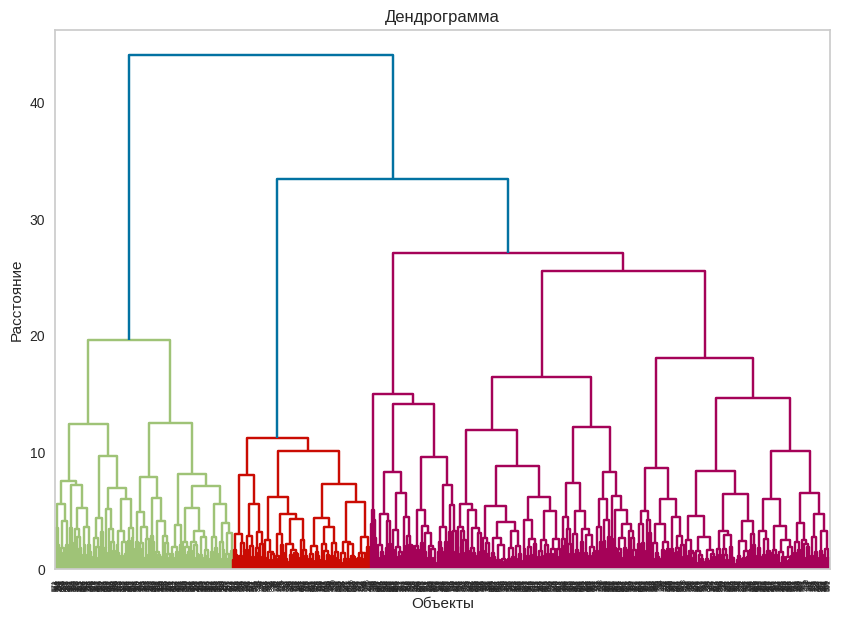

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linked = linkage(heart_data_new[numerical_features], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

Глобальное разделение на три кластера. На уровне расстояния около 40 можно выделить три основные группы. Это может свидетельствовать о крупном разделении данных на основе важных факторов. Дополнительное деление до 5 кластеров. При снижении порога до расстояния примерно 30 одна из крупных групп делится на две меньшие. Это может указывать на наличие более детализированных паттернов в этой группе. Высота разрывов. Крупные разрывы на дендрограмме (в районе расстояния 40 и 30) указывают на значимые различия между кластерами. \
Кластер 1 (Зеленый). Люди с менее выраженными симптомами. Например, низкий уровень холестерина (Cholesterol). \
Кластер 2 (Оранжевый). Люди с умеренными рисками. Возможно, это группа с разными комбинациями факторов. \
Кластер 3 (Фиолетовый). Люди с высокими рисками сердечных заболеваний. Например, высокий уровень холестерина и низкий MaxHR. \
На основании дендограммы, оптимальное количество кластеров, скорее всего, будет равно 3 или 4. Это видно по четкому разделению на 3-4 большие группы, где разрывы достаточно значительные. \
Подсчет средних показателей по каждому признаку каждого кластера.

In [40]:
heart_data_with_clusters2 = heart_data.copy()
heart_data_with_clusters2['Cluster'] = model_agg.labels_
cluster_means = heart_data_with_clusters2.groupby('Cluster')[numerical_columns].mean()
cluster_means

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Cluster,,,,,,,
0,55.703297,133.329670,244.166667,0.005495,132.012821,1.080952,0.571429
1,56.985782,134.857820,235.966825,1.000000,130.962085,1.036493,0.796209
2,41.786585,127.006098,235.097561,0.000000,160.384146,0.121341,0.176829


*   Выводы по кластеру 0. Этот кластер включает пациентов
среднего возраста (средний возраст 55.70 лет) с умеренным риском сердечно-сосудистых заболеваний (средний показатель HeartDisease 0.57). Пациенты могут иметь признаки гипертонии (средний показатель RestingBP 133.33) и повышенный уровень холестерина (средний показатель Cholesterol 244.17). Уровень сахара в крови в пределах нормы (средний показатель FastingBS 0.005). Максимальная частота пульса немного ниже возрастной нормы (средний показатель MaxHR 132.01).
*   Выводы по кластеру 1. Пациенты этого кластера относятся к старшей возрастной группе (средний возраст 56.99 лет) и имеют высокий риск сердечно-сосудистых заболеваний (средний показатель HeartDisease 0.8), связанный с диабетом (средний показатель сахара FastingBS 1.00). У них отмечается повышенное артериальное давление (средний показатель RestingBP 134.86) и умеренно высокий уровень холестерина (средний показатель Cholesterol 235.97). Максимальная частота пульса ниже нормы (средний показатель MaxHR 130.96). \
*   Выводы по кластеру 2. Этот кластер включает пациентов младшей возрастной группы (средний возраст 41.79 лет) с низким риском сердечно-сосудистых заболеваний (средний показатель HeartDisease 0.18). У них нормальное артериальное давление (средний показатель RestingBP 127.01) и умеренный уровень холестерина (средний показатель Cholesterol 235.10). Пациенты имеют нормальный уровень сахара в крови (средний показатель FastingBS 0.00) и высокую максимальную частоту пульса (средний показатель MaxHR 160.38). Таким образом, пациенты из кластера 2 имеют самый низкий риск, а пациенты из кластера 1 наиболее подвержены рискам сердечно-сосудистых заболеваний. \
Расчет метрик качества.








In [41]:
silhouette_avg = silhouette_score(heart_data_new[numerical_features], model_agg.labels_)
print(f"Силуэтный коэффициент: {silhouette_avg:.2f}")
davies_bouldin = davies_bouldin_score(heart_data_new[numerical_features], model_agg.labels_)
print(f"Индекс Дэвиса-Боулдина: {davies_bouldin:.2f}")

Силуэтный коэффициент: 0.15
Индекс Дэвиса-Боулдина: 1.69


Значение 0.15 по метрике Силуэта указывает на слабую разделимость кластеров. Это плохой результат. Кластеры пересекаются или имеют схожие характеристики, что делает их разделение нечетким. \
Значение 1.69 по индексу Давида-Боулда относительно высокое. Это указывает на то, что кластеры имеют не слишком четкие границы, а объекты в пределах кластеров имеют значительные перекрытия между собой. \
Оба метода кластеризации дают слабые результаты в плане разделения кластеров, что может быть связано с неоднородностью данных или некорректным числом кластеров. Метод K-means показывает немного лучшие результаты по метрике Силуэта (0.21), что указывает на более четкое разделение кластеров по сравнению с иерархической кластеризацией (0.15), хотя оба метода показывают недостаточное качество кластеризации. Иерархическая кластеризация имеет чуть выше индекс Давида-Боулдина, что может означать, что кластеры в этом случае еще более пересекаются и имеют слабую различимость.




Создается датафрейм, в котором указываются значения всех метрик для kmeans и AgglomerativeClustering.

In [42]:
k_means_2_clusters = KMeans(n_clusters = 2, random_state = 0).fit(heart_data_new[numerical_features])
labels_kmeans = k_means_2_clusters.labels_
labels_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

Выделение целовой переменной в переменную y_true для дальнейшего подсчета метрик. Так как из скопированного датафрейма heart_data_new была удалена целевая переменная, то ее необходимо получить из первоначального датафрейма. Вывод переменной y_true.

In [43]:
y_true = heart_data[goal_var]
y_true

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
916,1
917,0
918,1
919,0


Импорт библиотек. Подсчет значений метрик Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Fowlkes-Mallows Index (FMI), Homogeneity, Completeness, V-measure, Silhouette Score для обученной модели k_means_2_clusters.

In [44]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, silhouette_score
metrics_kmeans = {
    "ARI": adjusted_rand_score(y_true, labels_kmeans),
    "AMI": adjusted_mutual_info_score(y_true, labels_kmeans),
    "FMI": fowlkes_mallows_score(y_true, labels_kmeans),
    "Homogenity": homogeneity_score(y_true, labels_kmeans),
    "Completeness": completeness_score(y_true, labels_kmeans),
    "V-measure": v_measure_score(y_true, labels_kmeans),
    "Silhouette": silhouette_score(heart_data_new[numerical_features], labels_kmeans)
}

Далее обучение модели кластеризации методом AgglomerativeClustering для двух кластеров. Запись предсказаний модели в переменную labels_agglo. Вывод labels_agglo.

In [45]:
agglo_2_clusters = AgglomerativeClustering(n_clusters=2).fit(heart_data_new[numerical_features])
labels_agglo = agglo_2_clusters.labels_
labels_agglo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

Подсчет значений метрик Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Fowlkes-Mallows Index (FMI), Homogeneity, Completeness, V-measure, Silhouette Score для обученной модели agglo_2_clusters.

In [46]:
metrics_agglo = {
    "ARI": adjusted_rand_score(y_true, labels_agglo),
    "AMI": adjusted_mutual_info_score(y_true, labels_agglo),
    "FMI": fowlkes_mallows_score(y_true, labels_agglo),
    "Homogenity": homogeneity_score(y_true, labels_agglo),
    "Completeness": completeness_score(y_true, labels_agglo),
    "V-measure": v_measure_score(y_true, labels_agglo),
    "Silhouette": silhouette_score(heart_data_new[numerical_features], labels_agglo)
}

После расчета метрик создается DataFrame с результатами.

In [47]:
df_metrics = pd.DataFrame([metrics_kmeans, metrics_agglo], index=["KMeans", "AgglomerativeClustering"])
df_metrics

,ARI,AMI,FMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.024475,0.061121,0.580497,0.055398,0.070265,0.061952,0.243532
AgglomerativeClustering,0.023677,0.061179,0.581673,0.055275,0.070620,0.062013,0.237933


Анализ полученных результатов. \
Значение ARI очень низкое, около 0.024 для обеих моделей. Это говорит о том, что кластеры, полученные KMeans и AgglomerativeClustering, почти не совпадают с истинными классами. Модель не находит структуру данных, близкую к истинному распределению. \
Значение AMI примерно 0.061 для обеих моделей. Низкая взаимная информация между предсказанными кластерами и истинными классами. Это говорит о том, что кластеры не несут полезной информации относительно исходных классов. \
Значение FMI примерно 0.58 для обеих моделей. FMI показывает, что есть умеренное сходство между предсказанными кластерами и истинными классами. Это значение выше, чем у ARI и AMI, но все еще не идеальное. Можно сделать вывод, что некоторая структура в данных есть, но модели работают слабо. \
Значение Homogeneity также мало, примерно 0.055 для обеих моделей. Это говорит о том, что большая часть объектов в каждом кластере не принадлежит к одному классу. Модели не находят однородные кластеры. \
Значение Completeness также мало, примерно 0.070 для обеих моделей. Это может говорить о том, что кластеры не полностью охватывают классы. \
Значение V-measure примерно 0.062 для обеих моделей. Такое низкое значение указывает на плохой баланс между однородностью и полнотой. \
Значения Silhouette для модели KMeans (0.2435) и модели AgglomerativeClustering (0.2379) означают, что кластеры плохо разделены, а объекты внутри кластеров не так уж близки друг к другу. \
Оба метода кластеризации показывают слабые результаты. Метрики ARI, AMI, Homogeneity и V-measure указывают на почти случайное совпадение кластеров с истинными классами. Silhouette Score указывает, что данные слабо структурированы для кластеризации на 2 группы. \
Вероятно, к таким плохим результатам привело невключение категориальных данных в кластеризацию. Для кластеризации использовались только числовые данные, что вполне могло дать модели ограниченную информацию о болезнях, недостаточную информацию для качественного обучения.